In [87]:
import glob
from matplotlib import pyplot as plt
from policy import CYCLE_COST

In [1]:
configs = [
    ("bw",False,"hadd","random",60),
    ("bw",True,"hadd","bounds",60),
    ("b",False,"hadd","random",60),
    ("w",False,"hadd","random",60)
]

In [124]:
def parse_results_line(line):
    splitted = line.split(";")
    results = dict()
    results["best"] = int(splitted[0])
    results["worst"] = int(splitted[1])
    results["size"] = int(splitted[2])
    results["time"] = float(splitted[3])
    results["iterations"] = int(splitted[4])
    results["expansions"] = int(splitted[5])
    results["generations"] = int(splitted[6])
    results["max_open"] = int(splitted[7])
    return results

In [5]:
domain_folders = sorted(glob.glob("benchmarks/*"))
all_domains = [folder[folder.rfind("/")+1:] for folder in domain_folders]

['beam-walk',
 'chain-of-rooms',
 'doors',
 'frozenlake',
 'icylake',
 'islands',
 'mod_first_responders',
 'st_blocksworld',
 'st_first_responders',
 'st_tires',
 'tireworld',
 'tireworld-truck']

### Coverage BOAND*: Plain vs Opt
A fully computed Pareto frontier adds 1 to the score

DOMAIN | ('bw', False, 'hadd', 'random', 60) | ('bw', True, 'hadd', 'bounds', 60) | ('bw', False, 'hadd', 'best', 60) | ('bw', True, 'hadd', 'best', 60) | ('bw', False, 'hadd', 'bounds', 60) | ('bw', True, 'hadd', 'random', 60)
beam-walk | 7 | 6 | 7 | 7 | 6 | 7
chain-of-rooms | 6 | 2 | 7 | 6 | 1 | 7
doors | 7 | 7 | 7 | 7 | 7 | 7
frozenlake | 25 | 26 | 28 | 26 | 27 | 27
icylake | 1 | 1 | 1 | 1 | 1 | 1
islands | 20 | 18 | 19 | 18 | 19 | 18
mod_first_responders | 10 | 11 | 10 | 10 | 11 | 10
st_blocksworld | 1 | 2 | 0 | 1 | 1 | 0
st_first_responders | 8 | 8 | 8 | 8 | 8 | 8
st_tires | 11 | 11 | 11 | 11 | 11 | 11
tireworld | 9 | 13 | 11 | 9 | 12 | 9
tireworld-truck | 10 | 10 | 10 | 10 | 10 | 10


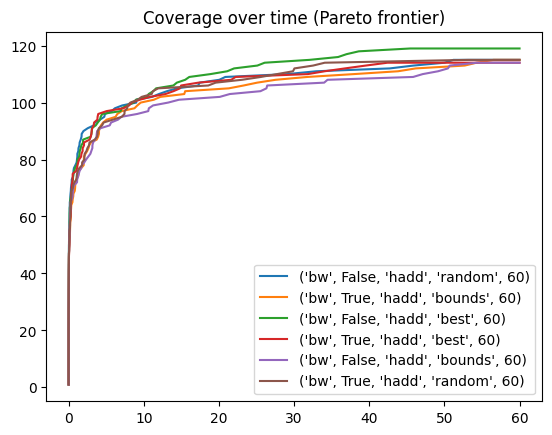

In [146]:
configs = [
    ("bw",False,"hadd","random",60),
    ("bw",True,"hadd","bounds",60),
    ("bw",False,"hadd","best",60),
    ("bw",True,"hadd","best",60),
    ("bw",False,"hadd","bounds",60),
    ("bw",True,"hadd","random",60),
    # ("wb",True,"hadd","bounds",60),


]

coverage = {config:{domain:0 for domain in all_domains} for config in configs}
times = {config:[] for config in configs}

for domain in all_domains:
    domain_folder = "benchmarks/%s" % domain
    problem_files = sorted(glob.glob(domain_folder + "/p*.pddl"))
    problem_names = [problem_file[problem_file.rfind("/")+1:-5] for problem_file in problem_files]

    for pname in problem_names:
        for config in configs:
            results_folder = "results/%s/%s/" % (domain, "_".join(map(str,list(config))))

            results_file = "{}/{}.stats".format(results_folder, pname)
            if results_file in glob.glob(results_file):
                with open(results_file, "r") as f:
                    lines = f.readlines()

                results = [parse_results_line(line) for line in lines]
                if results[-1]["best"] == -1:
                    coverage[config][domain] += 1
                    times[config] += [results[-1]["time"]]

    # coverage_plain[domain] = round(coverage_plain[domain]/len(problem_files),2)
    # coverage_opt[domain] = round(coverage_opt[domain]/len(problem_files),2)

print("DOMAIN | " + " | ".join(map(str,configs)))
for domain in all_domains:
    print("{} | ".format(domain) + " | ".join(map(str,[coverage[config][domain] for config in configs])))

for config in configs:
    times[config] = sorted(times[config])
    solved = list(range(1, len(times[config])+1))

    times[config].append(config[-1])
    solved.append(solved[-1])

    plt.plot(times[config], solved, label=str(config))
plt.title("Coverage over time (Pareto frontier)")
plt.legend()

### Coverage BOAND*: Plain vs Opt
A Pareto-optimal solution adds 1 to the score

DOMAIN | ('bw', False, 'hadd', 'random', 60) | ('bw', False, 'hadd', 'bounds', 60) | ('bw', False, 'hadd', 'best', 60) | ('bw', True, 'hadd', 'random', 60) | ('bw', True, 'hadd', 'bounds', 60) | ('bw', True, 'hadd', 'best', 60)
beam-walk | 7 | 6 | 7 | 7 | 6 | 7
chain-of-rooms | 6 | 8 | 8 | 8 | 10 | 6
doors | 7 | 7 | 7 | 7 | 7 | 7
frozenlake | 27 | 29 | 28 | 28 | 30 | 28
icylake | 2 | 2 | 2 | 2 | 2 | 2
islands | 20 | 19 | 19 | 18 | 18 | 18
mod_first_responders | 14 | 16 | 14 | 14 | 16 | 14
st_blocksworld | 1 | 1 | 0 | 0 | 3 | 2
st_first_responders | 10 | 10 | 10 | 10 | 10 | 10
st_tires | 11 | 12 | 11 | 11 | 12 | 11
tireworld | 8 | 12 | 9 | 11 | 12 | 11
tireworld-truck | 10 | 10 | 10 | 10 | 10 | 10


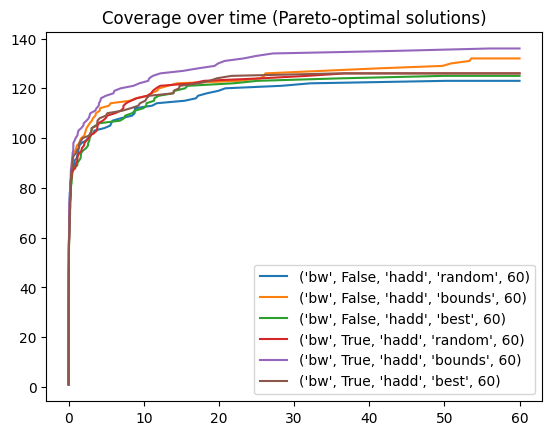

In [145]:
configs = [
    ("bw",False,"hadd","random",60),
    ("bw",False,"hadd","bounds",60),
    ("bw",False,"hadd","best",60),
    ("bw",True,"hadd","random",60),
    ("bw",True,"hadd","bounds",60),
    ("bw",True,"hadd","best",60),


    # ("wb",True,"hadd","bounds",60),

]

coverage = {config:{domain:0 for domain in all_domains} for config in configs}
times = {config:[] for config in configs}

for domain in all_domains:
    domain_folder = "benchmarks/%s" % domain
    problem_files = sorted(glob.glob(domain_folder + "/p*.pddl"))
    problem_names = [problem_file[problem_file.rfind("/")+1:-5] for problem_file in problem_files]

    for pname in problem_names:
        for config in configs:
            results_folder = "results/%s/%s/" % (domain, "_".join(map(str,list(config))))
            results_file = "{}/{}.stats".format(results_folder, pname)
            if results_file in glob.glob(results_file):
                with open(results_file, "r") as f:
                    lines = f.readlines()

                results = [parse_results_line(line) for line in lines]
                for result in results:
                    if result["best"] != -1:
                        coverage[config][domain] += 1
                        times[config] += [result["time"]]
                        

print("DOMAIN | " + " | ".join(map(str,configs)))
for domain in all_domains:
    print("{} | ".format(domain) + " | ".join(map(str,[coverage[config][domain] for config in configs])))

for config in configs:
    times[config] = sorted(times[config])
    solved = list(range(1, len(times[config])+1))

    times[config].append(config[-1])
    solved.append(solved[-1])

    plt.plot(times[config], solved, label=str(config))
plt.title("Coverage over time (Pareto-optimal solutions)")
plt.legend()

### Quality Comparison

109 points


Text(0.5, 1.0, 'Comparsion of best case solution quality')

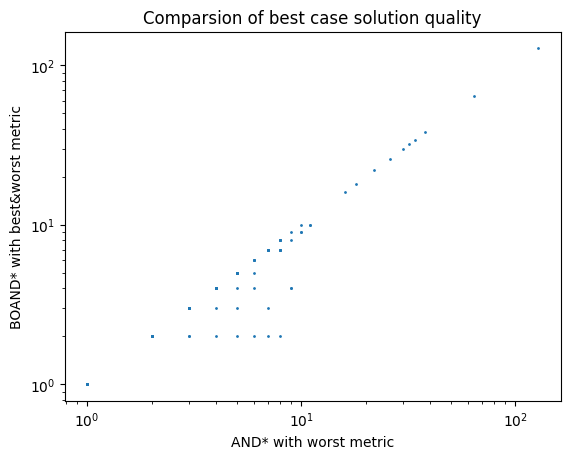

In [118]:
from random import random, randint, seed

def replace_value(x, old_value, new_value):
    if x == old_value:
        return new_value
    else:
        return x
    

def add_noise(x, cycle_cost):
    if x == cycle_cost:
        return x
    else:
        return x + x* 0.05 * random() * randint(-1,1)

configs = dict()
configs["pareto"] = ("bw",True,"hadd","bounds",60)
configs["best"] = ("b",False,"hadd","random",60)
configs["worst"] = ("w",False,"hadd","random",60)

folders = {k:"_".join(map(str,list(configs[k]))) for k in configs.keys()}

other_approach = "worst"
criteria = "best"

comparison = ["pareto", other_approach]
points = {approach:[] for approach in comparison}
for domain in all_domains:
    domain_folder = "benchmarks/%s" % domain
    problem_files = sorted(glob.glob(domain_folder + "/p*.pddl"))
    problem_names = [problem_file[problem_file.rfind("/")+1:-5] for problem_file in problem_files]
    
    for pname in problem_names:
        psols = {approach:[] for approach in comparison}
        for approach in comparison:
            results_file = "results/{}/{}/{}.stats".format(domain, folders[approach], pname)
            if results_file in glob.glob(results_file):
                with open(results_file, "r") as f:
                    lines = f.readlines()

                results = [parse_results_line(line) for line in lines]
                for result in results:
                    if result["best"] != -1:
                        psols[approach].append(result)
        
        if all([len(psols[approach]) != 0 for approach in comparison]):
            pareto_front = psols["pareto"]
            other_solution = psols[other_approach][0]
            for solution in pareto_front:
                if solution["best"] <= other_solution["best"] and solution["worst"] <= other_solution["worst"]:
                    points[other_approach].append(other_solution[criteria])
                    points["pareto"].append(solution[criteria])


all_noncycle_values = [value for value in points["pareto"] + points[other_approach] if value != CYCLE_COST]
new_cycle_cost = max(all_noncycle_values)*10

for approach in comparison:
    # CHANGE CYCLE COST
    points[approach] = list(map(lambda x: replace_value(x, CYCLE_COST, new_cycle_cost), points[approach]))
    # ADD SMALL NOISE 
    seed(123)
    # points[approach] = list(map(lambda x: add_noise(x, new_cycle_cost), points[approach]))


print("%s points" % len(points["pareto"]))

plt.scatter(points[other_approach], points["pareto"], s=1)
plt.xscale("log")
plt.yscale("log")

plt.xlabel("AND* with %s metric" % other_approach)
plt.ylabel("BOAND* with %s metric" % "best&worst")
plt.title("Comparsion of %s case solution quality" % criteria )
# plt.legend()

Text(0.5, 1.0, 'expansions')

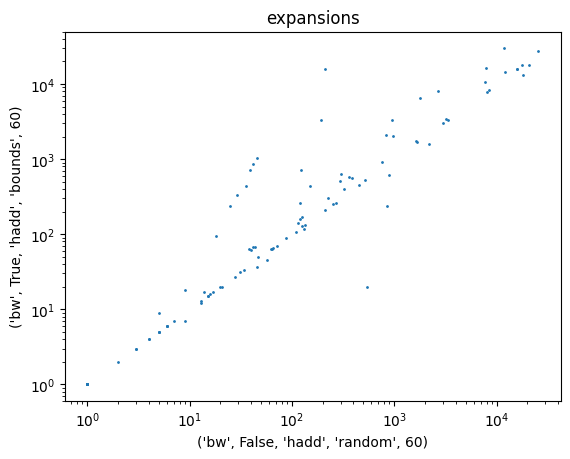

In [141]:
configs = [
    ("bw",False,"hadd","random",60),
    ("bw",False,"hadd","bounds",60),
    ("bw",True,"hadd","random",60),
    ("bw",True,"hadd","bounds",60),
    # ("wb",True,"hadd","bounds",60),

]

comparison = (configs[0], configs[3])

criteria = "expansions"
points = {approach:[] for approach in comparison}

for domain in all_domains:
    domain_folder = "benchmarks/%s" % domain
    problem_files = sorted(glob.glob(domain_folder + "/p*.pddl"))
    problem_names = [problem_file[problem_file.rfind("/")+1:-5] for problem_file in problem_files]

    for pname in problem_names:
        values = []
        for config in comparison:
            results_folder = "results/%s/%s/" % (domain, "_".join(map(str,list(config))))

            results_file = "{}/{}.stats".format(results_folder, pname)
            if results_file in glob.glob(results_file):
                with open(results_file, "r") as f:
                    lines = f.readlines()

                results = [parse_results_line(line) for line in lines]
                if results[-1]["best"] == -1:
                    values += [results[-1][criteria]]
        if len(values) == len(comparison):
            for i in range(len(comparison)):
                points[comparison[i]] += [values[i]]


plt.scatter(points[comparison[0]], points[comparison[1]], s=1)
plt.xlabel(comparison[0])
plt.ylabel(comparison[1])
plt.xscale("log")
plt.yscale("log")

plt.title("%s" % criteria )
# plt.legend()